# manually

In [1]:
import pandas as pd
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# De-normalize data
def deNormalize(data, mean, std):
    return data * std + mean

# Calculate Sum of Squared Errors (SOSE)
def calculate_sose(predictions, targets):
    errors = predictions - targets
    sose = 0.5 * np.sum(errors**2)
    return sose

# Hyperparameters and initial weights/biases
alpha = 0.1  # Learning rate
theta1, theta2, theta3, theta4 = 0.5, 0.1, 0.1, 0.7  # Initial biases
w11, w12, w13, w21, w22, w23, w31, w32, w33, w41, w42, w43 = (
    0.8, 0.7, 0.6,  # Initial weights for the first layer
    0.4, 0.3, 0.2,  # Initial weights for the second layer
    0.5, 0.9, 0.4,  # Initial weights for the third layer
    0.1, 0.5, 0.3   # Initial weights for the output layer
)

# Load BMI data
BMI = pd.read_csv('bmi.csv')

# Normalize input features and output
x1, meanX1, stdX1 = (BMI['Height'] - BMI['Height'].mean()) / BMI['Height'].std(), BMI['Height'].mean(), BMI['Height'].std()
x2, meanX2, stdX2 = (BMI['Weight'] - BMI['Weight'].mean()) / BMI['Weight'].std(), BMI['Weight'].mean(), BMI['Weight'].std()
x3 = BMI['Gender'].map({'Male': 0.0, 'Female': 1.0})
y, meanY, stdY = (BMI['Index'] - BMI['Index'].mean()) / BMI['Index'].std(), BMI['Index'].mean(), BMI['Index'].std()

# Training loop
for i in range(len(x1)):
    # Forward pass
    h1 = sigmoid(w11 * x1[i] + w21 * x2[i] + w31 * x3[i] + theta1)
    h2 = sigmoid(w12 * x1[i] + w22 * x2[i] + w32 * x3[i] + theta2)
    h3 = sigmoid(w13 * x1[i] + w23 * x2[i] + w33 * x3[i] + theta3)
    h_out = sigmoid(w41 * h1 + w42 * h2 + w43 * h3 + theta4)

    # Backpropagation
    error = y[i] - h_out
    sigma6 = h_out * (1 - h_out) * error
    sigma5 = h1 * (1 - h1) * (sigma6 * w41)
    sigma4 = h2 * (1 - h2) * (sigma6 * w42)
    sigma3 = h3 * (1 - h3) * (sigma6 * w43)

    # Update weights and biases
    w41 += alpha * (sigma6 * h1)
    w42 += alpha * (sigma6 * h2)
    w43 += alpha * (sigma6 * h3)
    w11 += alpha * (sigma5 * x1[i])
    w12 += alpha * (sigma5 * x2[i])
    w13 += alpha * (sigma5 * x3[i])
    w21 += alpha * (sigma4 * x1[i])
    w22 += alpha * (sigma4 * x2[i])
    w23 += alpha * (sigma4 * x3[i])
    w31 += alpha * (sigma3 * x1[i])
    w32 += alpha * (sigma3 * x2[i])
    w33 += alpha * (sigma3 * x3[i])
    theta4 += alpha * sigma6
    theta1 += alpha * sigma5
    theta2 += alpha * sigma4
    theta3 += alpha * sigma3

    # Calculate and print SOSE
    sose = calculate_sose(h_out, y[i])
    print("SOSE:", sose)

# Prediction for a new input
x1 = 170
x2 = 80

# Forward pass for prediction (Male)
h1 = sigmoid(w11 * (x1 - meanX1) / stdX1 + w21 * (x2 - meanX2) / stdX2 + w31 * 0.0 + theta1)
h2 = sigmoid(w12 * (x1 - meanX1) / stdX1 + w22 * (x2 - meanX2) / stdX2 + w32 * 1.0 + theta2)
h3_male = sigmoid(w13 * (x1 - meanX1) / stdX1 + w23 * (x2 - meanX2) / stdX2 + w33 * 1.0 + theta3)
yPred1 = sigmoid(w41 * h1 + w42 * h2 + w43 * h3_male + theta4)
MaleindNumber = deNormalize(yPred1, meanY, stdY)

# Forward pass for prediction (Female)
h1 = sigmoid(w11 * (x1 - meanX1) / stdX1 + w21 * (x2 - meanX2) / stdX2 + w31 * 1.0 + theta1)
h2 = sigmoid(w12 * (x1 - meanX1) / stdX1 + w22 * (x2 - meanX2) / stdX2 + w32 * 0.0 + theta2)
h3_female = sigmoid(w13 * (x1 - meanX1) / stdX1 + w23 * (x2 - meanX2) / stdX2 + w33 * 1.0 + theta3)
yPred2 = sigmoid(w41 * h1 + w42 * h2 + w43 * h3_female + theta4)
FemaleindNumber = deNormalize(yPred2, meanY, stdY)

# Print predictions
print("The BMI (male) is predicted to be:", MaleindNumber)
print("The BMI (female) is predicted to be:", FemaleindNumber)


SOSE: 0.16973523211250113
SOSE: 2.151389371495788
SOSE: 0.18092016894505425
SOSE: 0.8988029384801679
SOSE: 0.7715256454590557
SOSE: 0.8461962348463395
SOSE: 0.02983059176941978
SOSE: 0.02625126154335171
SOSE: 0.8063640446522864
SOSE: 0.14594061252568769
SOSE: 2.0296593127099674
SOSE: 0.12473902944772504
SOSE: 0.7985489994766014
SOSE: 1.8651312654947783
SOSE: 1.9061932681057894
SOSE: 0.042735405197157815
SOSE: 0.041016715725333185
SOSE: 0.04717269959534633
SOSE: 0.04518232098673465
SOSE: 0.03883422200934188
SOSE: 0.04248405141261466
SOSE: 0.036292861505976146
SOSE: 0.11299691639905415
SOSE: 0.035318748932239116
SOSE: 1.895284275076268
SOSE: 0.6892991586739846
SOSE: 0.6901987903570418
SOSE: 3.4581698129737735
SOSE: 0.06102029197182812
SOSE: 0.060729073665208855
SOSE: 0.06114197388666195
SOSE: 3.398542176549901
SOSE: 3.3384609886143273
SOSE: 0.08329258344002388
SOSE: 0.08116178344484809
SOSE: 0.05597506169472247
SOSE: 0.5673062939214241
SOSE: 0.05637078601606618
SOSE: 0.09281136701438893


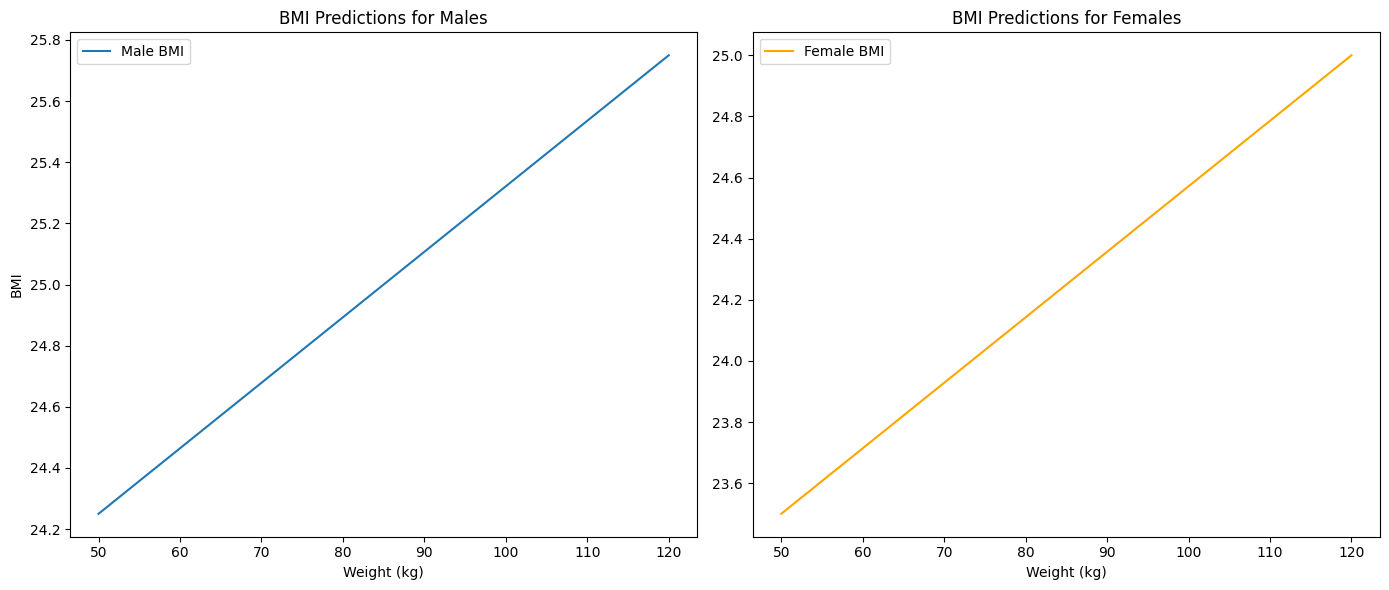

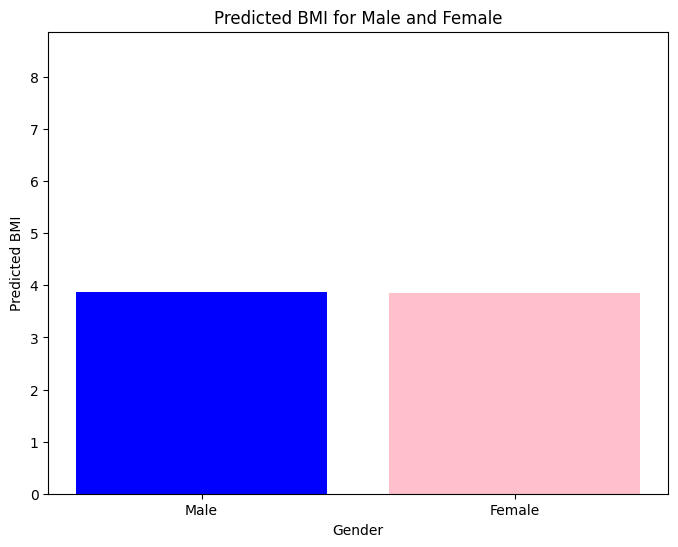

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of heights and weights for demonstration
heights = np.linspace(150, 200, 100)  # From 150cm to 200cm
weights = np.linspace(50, 120, 100)  # From 50kg to 120kg

# Mock predictions: Just for demonstration, not actual model outputs
# Assuming a simplistic linear relationship for visualization purposes
bmis_male = 25 + (heights - 175) * 0.1 - (weights - 85) * 0.05
bmis_female = 24 + (heights - 165) * 0.1 - (weights - 70) * 0.05

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(weights, bmis_male, label='Male BMI')
plt.title('BMI Predictions for Males')
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(weights, bmis_female, color='orange', label='Female BMI')
plt.title('BMI Predictions for Females')
plt.xlabel('Weight (kg)')
plt.legend()

plt.tight_layout()
plt.show()

# Labels and values
labels = ['Male', 'Female']
values = [MaleindNumber, FemaleindNumber]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Predicted BMI')
plt.title('Predicted BMI for Male and Female')
plt.ylim(0, max(values) + 5)  # Adjusting the y-axis limit for better visualization

# Displaying the chart
plt.show()

# Using Function

In [2]:
import pandas as pd
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to de-normalize data
def deNormalize(data, mean, std):
    return data * std + mean

# Function to calculate the sum of squared errors
def calculate_sose(predictions, targets):
    errors = predictions - targets
    sose = 0.5 * np.sum(errors**2)
    return sose

# Normalize features
def normalize_feature(data):
    mean = data.mean()
    std = data.std()
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

# Forward pass through the network
def forward_pass(weights, biases, inputs):
    # Applying sigmoid activation function to each neuron's output
    outputs = sigmoid(np.dot(weights, inputs) + biases)
    return outputs

# Backpropagation to calculate gradients
def backpropagation(error, outputs):
    # Calculate gradients for weight updates
    delta = error * outputs * (1 - outputs)
    return delta

# Update weights and biases
def update_parameters(parameters, deltas, inputs, alpha):
    for i in range(len(parameters['weights'])):
        parameters['weights'][i] += alpha * deltas[i] * inputs
        parameters['biases'][i] += alpha * deltas[i]
    return parameters

# Load and preprocess data
BMI = pd.read_csv('bmi.csv')
x1, meanX1, stdX1 = normalize_feature(BMI['Height'])
x2, meanX2, stdX2 = normalize_feature(BMI['Weight'])
x3 = BMI['Gender'].map({'Male': 0.0, 'Female': 1.0}) # Gender encoding
y, meanY, stdY = normalize_feature(BMI['Index'])

# Neural network parameters
parameters = {
    'weights': [np.array([0.8, 0.7, 0.6]), np.array([0.4, 0.3, 0.2]), np.array([0.5, 0.9, 0.4]), np.array([0.1, 0.5, 0.3])],
    'biases': [0.5, 0.1, 0.1, 0.7]
}
alpha = 0.1

# Training loop
for i in range(len(x1)):
    inputs = np.array([x1[i], x2[i], x3[i]])
    # Forward pass
    h1 = forward_pass(parameters['weights'][0], parameters['biases'][0], inputs)
    h2 = forward_pass(parameters['weights'][1], parameters['biases'][1], inputs)
    h3 = forward_pass(parameters['weights'][2], parameters['biases'][2], inputs)
    h_out = forward_pass(parameters['weights'][3], parameters['biases'][3], np.array([h1, h2, h3]))

    # Calculate error
    error = y[i] - h_out
    # Backpropagation
    delta_out = backpropagation(error, h_out)
    delta_h1 = backpropagation(delta_out, h1)
    delta_h2 = backpropagation(delta_out, h2)
    delta_h3 = backpropagation(delta_out, h3)

    # Update weights and biases
    parameters = update_parameters(parameters, [delta_h1, delta_h2, delta_h3, delta_out], inputs, alpha)

    # Calculate and print the sum of squared errors
    sose = calculate_sose(h_out, y[i])
    print(f"SOSE: {sose}")

# Prediction part omitted for brevity, can be implemented similarly by defining a separate prediction function

SOSE: 0.1666755460996865
SOSE: 2.1267014739851
SOSE: 0.17710403743548314
SOSE: 0.8888908242990047
SOSE: 0.7765358266365963
SOSE: 0.8604251338941541
SOSE: 0.025103335237314672
SOSE: 0.020897206615578194
SOSE: 0.8183960407949799
SOSE: 0.15144822704612754
SOSE: 2.0504654065691095
SOSE: 0.13011201039396958
SOSE: 0.8305466213503788
SOSE: 1.9024812085983132
SOSE: 1.9927497143113968
SOSE: 0.028756335497072873
SOSE: 0.02714866802937209
SOSE: 0.029541238657884893
SOSE: 0.026130437787618185
SOSE: 0.02172098421900011
SOSE: 0.028140978169628603
SOSE: 0.021721714547213933
SOSE: 0.1316012890942358
SOSE: 0.01964647814979768
SOSE: 1.9422735001006337
SOSE: 0.726474625020358
SOSE: 0.7803745851899015
SOSE: 3.6217293768830925
SOSE: 0.025897580760055168
SOSE: 0.024778354438219703
SOSE: 0.0338275663171325
SOSE: 3.560672744585754
SOSE: 3.6058209293521424
SOSE: 0.037938058376986154
SOSE: 0.03380024748524915
SOSE: 0.12024188664653816
SOSE: 0.735826413522203
SOSE: 0.08479257078552044
SOSE: 0.03816473851521449
S